In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [163]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [164]:
X = data.x
y = data.y

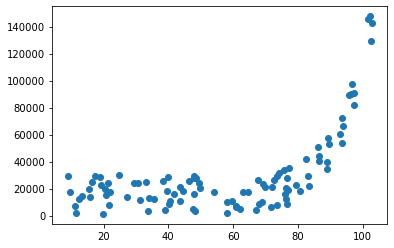

In [165]:
plt.scatter(X, y)

In [166]:
X = pd.DataFrame(X)

In [167]:
from sklearn.linear_model import LinearRegression

time_start = time.time()

linear = LinearRegression().fit(X, y)

time_delta_lin = time.time()-time_start

time_delta_lin

0.011997222900390625

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


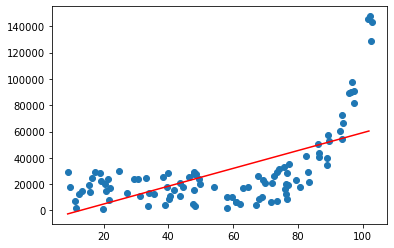

In [168]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


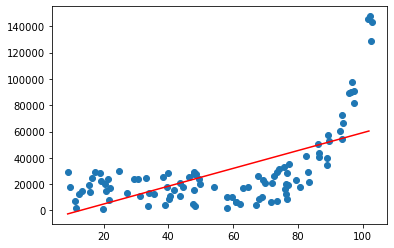

In [169]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [170]:
linear.score(X, y)

0.37467360318911636

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [172]:
transformation = PolynomialFeatures(degree=2)

In [173]:
transformation.fit(X)

PolynomialFeatures()

In [174]:
X_2 = transformation.transform(X)

In [175]:
X_2.shape, X_2[:5]

((100, 3),
 array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
        [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
        [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
        [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
        [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]]))

In [176]:
time_st = time.time()

poly_2d = LinearRegression().fit(X_2, y)

time_delta_poly2 = time.time()-time_st
time_delta_poly2

0.002000570297241211

In [177]:
xx_2d = transformation.transform(pd.DataFrame(xx))

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


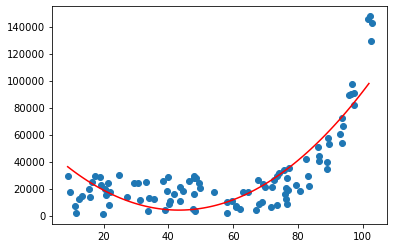

In [178]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [179]:
poly_2d.score(X_2, y)

0.7359753787024842

In [180]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [181]:
y = data.y
X = data.drop(["y"], axis=1)

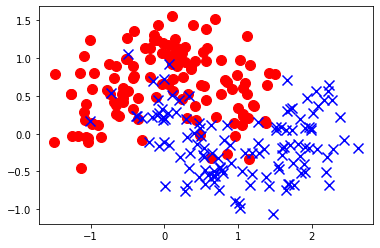

In [182]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
t_st = time.time()

logistic = LogisticRegression().fit(X, y)

time_delta_log = time.time()-t_st
time_delta_log

0.08546805381774902

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


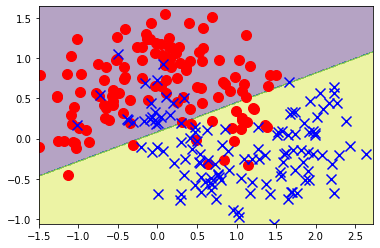

In [185]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [186]:
logistic.score(X, y)

0.832

In [187]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [188]:
X_3.shape

(250, 9)

In [189]:
time_st = time.time()

class_3 = LogisticRegression().fit(X_3, y)

time_delta_poly3 = time.time()-time_st
time_delta_poly3

0.034993886947631836

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


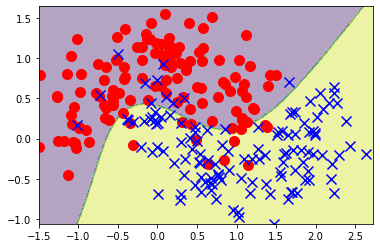

In [190]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [191]:
class_3.score(X_3, y)

0.9

In [192]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [193]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [194]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [195]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [196]:
time_st = time.time()

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

time_delta_reg_kc = time.time() - time_st

time_delta_reg_kc

0.09097719192504883

In [197]:
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109157

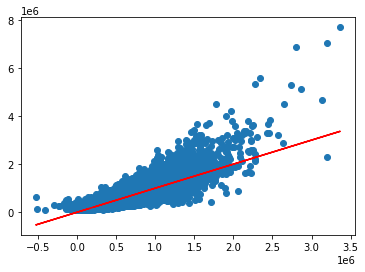

In [198]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [199]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [200]:
X_3_kc_prices.shape

(21613, 1330)

In [80]:
time_st = time.time()

reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

time_delta_reg_poly2_kc = time.time() - time_st

time_delta_reg_poly2_kc

5.227627277374268

In [73]:
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8641868188657003

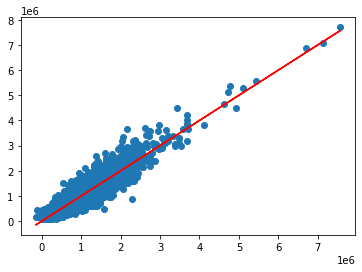

In [74]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

### Задания для самостоятельного выполнения

#### 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [81]:
time_delta

0.0030007362365722656

In [82]:
time_delta_lin

0.0029981136322021484

In [83]:
time_delta_log

0.010018587112426758

In [84]:
time_delta_poly2

0.0010018348693847656

In [85]:
time_delta_poly3

0.013997554779052734

In [86]:
time_delta_reg_kc

0.021000385284423828

In [87]:
time_delta_reg_poly2_kc

5.227627277374268

#### 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [139]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [140]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [141]:
X = data.x
y = data.y

X = pd.DataFrame(X)

In [142]:
transformation = PolynomialFeatures(degree=5)

transformation.fit(X)

X_5 = transformation.transform(X)

X_5.shape,X_5[:5]

((100, 6),
 array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03, 9.01366562e+05,
         8.70700093e+07, 8.41076964e+09],
        [1.00000000e+00, 4.80028921e+01, 2.30427765e+03, 1.10611992e+05,
         5.30969551e+06, 2.54880741e+08],
        [1.00000000e+00, 4.79397558e+01, 2.29822018e+03, 1.10176114e+05,
         5.28181602e+06, 2.53208970e+08],
        [1.00000000e+00, 4.78090258e+01, 2.28570295e+03, 1.09277231e+05,
         5.22443797e+06, 2.49775290e+08],
        [1.00000000e+00, 6.97844271e+01, 4.86986627e+03, 3.39840828e+05,
         2.37155975e+07, 1.65497938e+09]]))

In [143]:
time_st = time.time()

poly_5d = LinearRegression().fit(X_5, y)

time_delta_poly5 = time.time()-time_st
time_delta_poly5

0.001999378204345703

In [144]:
poly_5d.score(X_5, y)

0.9217478060447022

In [145]:
transformation = PolynomialFeatures(degree=10)

transformation.fit(X)

X_10 = transformation.transform(X)

X_10.shape, X_10[:5]

((100, 11),
 array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03, 9.01366562e+05,
         8.70700093e+07, 8.41076964e+09, 8.12461679e+11, 7.84819949e+13,
         7.58118651e+15, 7.32325791e+17, 7.07410459e+19],
        [1.00000000e+00, 4.80028921e+01, 2.30427765e+03, 1.10611992e+05,
         5.30969551e+06, 2.54880741e+08, 1.22350127e+10, 5.87315995e+11,
         2.81928664e+13, 1.35333912e+15, 6.49641920e+16],
        [1.00000000e+00, 4.79397558e+01, 2.29822018e+03, 1.10176114e+05,
         5.28181602e+06, 2.53208970e+08, 1.21387762e+10, 5.81929966e+11,
         2.78975804e+13, 1.33740319e+15, 6.41147824e+16],
        [1.00000000e+00, 4.78090258e+01, 2.28570295e+03, 1.09277231e+05,
         5.22443797e+06, 2.49775290e+08, 1.19415133e+10, 5.70912117e+11,
         2.72947521e+13, 1.30493551e+15, 6.23876955e+16],
        [1.00000000e+00, 6.97844271e+01, 4.86986627e+03, 3.39840828e+05,
         2.37155975e+07, 1.65497938e+09, 1.15491788e+11, 8.05952827e+12,
         5.62429563e+14, 3

In [146]:
time_st = time.time()

poly_10d = LinearRegression().fit(X_10, y)

time_delta_poly10 = time.time()-time_st
time_delta_poly10

0.0010018348693847656

In [147]:
poly_10d.score(X_10, y)

0.9232002062570795

In [148]:
poly_10d.coef_

array([ 0.00000000e+00,  8.15660435e-07,  2.48375212e-07,  6.68368834e-06,
        1.32215306e-04,  1.52343697e-03, -1.02105220e-04,  2.65933860e-06,
       -3.39194242e-08,  2.12809704e-10, -5.25912263e-13])

#### 3. То же самое проделайте с датасетом для классификации и "King county".

In [152]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [153]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
# transformation = PolynomialFeatures(degree=5)

# transformation.fit(X_kc_prices)

# X_5_KC = transformation.transform(X_kc_prices)

# X_5_KC.shape,X_5_KC[:5]

In [ ]:
# time_st = time.time()

# poly_5d = LinearRegression().fit(X_5_KC, y)

# time_delta_poly5_kc = time.time()-time_st
# time_delta_poly5_kc

#### 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

#### 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

#### 6. Попробуйте также проинтерпретировать полиномиальную модель.